Business Objective: Segregate passengers into clusters based on similar characteristics like miles since they have enrolled.

# Hierarchical Clustering Q1

In [51]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import sklearn as sk

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [52]:
# importing the dataset
o_data = pd.read_excel('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\Hierarichal Clustering\\Assignment\\EastWestAirlines.xlsx',sheet_name=1)

In [53]:
data = o_data.copy()

In [54]:
# checking the features in the dataset
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [55]:
# Dimensions of the dataset
data.shape

(3999, 12)

In [56]:
# Checking for null values
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

There are no null values

In [57]:
# Checking for duplicate values
data.duplicated().sum()

0

There are no duplicate values

In [58]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [59]:
# Creating Feature Dictionary
feature_dict = pd.DataFrame(columns=['Name of Feature','Description','Type','Relevance'])

feature_dict ['Name of Feature'] = data.columns

feature_dict ['Description'] = ['Unique ID','Number of miles eligible for award travel',
'Number of miles counted as qualifying for Topflight status',
'Number of miles earned with freq. flyer credit card in the past 12 months:',
'Number of miles earned with Rewards credit card in the past 12 months:',
'Number of miles earned with Small Business credit card in the past 12 months',
'Number of miles earned from non-flight bonus transactions in the past 12 months',
'Number of non-flight bonus transactions in the past 12 months',
'Number of flight miles in the past 12 months','Number of flight transactions in the past 12 months',
'Number of days since enrolled in flier program','whether that person had award flight (free flight) or not']

feature_dict['Type'] = ['Nominal','Ratio','Ratio','Ratio','Ratio','Ratio','Ratio','Ratio',
                        'Ratio','Ratio','Ratio','Nominal']

feature_dict['Relevance'] = ['Irrelevant','Relevant','Relevant','Relevant','Relevant','Relevant','Relevant',
                            'Relevant','Relevant','Relevant','Relevant','Relevant']

feature_dict

,Name of Feature,Description,Type,Relevance
0,ID#,Unique ID,Nominal,Irrelevant
1,Balance,Number of miles eligible for award travel,Ratio,Relevant
2,Qual_miles,Number of miles counted as qualifying for Topf...,Ratio,Relevant
3,cc1_miles,Number of miles earned with freq. flyer credit...,Ratio,Relevant
4,cc2_miles,Number of miles earned with Rewards credit car...,Ratio,Relevant
5,cc3_miles,Number of miles earned with Small Business cre...,Ratio,Relevant
6,Bonus_miles,Number of miles earned from non-flight bonus t...,Ratio,Relevant
7,Bonus_trans,Number of non-flight bonus transactions in the...,Ratio,Relevant
8,Flight_miles_12mo,Number of flight miles in the past 12 months,Ratio,Relevant
9,Flight_trans_12,Number of flight transactions in the past 12 m...,Ratio,Relevant


In [60]:
# Dropping Irrelevant and output feature
data.drop(['ID#','Award?'],axis = 1, inplace = True )

In [61]:
# Statistical Description
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


<AxesSubplot:>

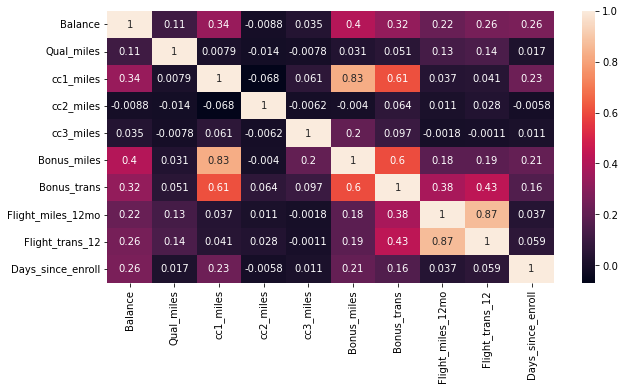

In [62]:
# Heat map to check for correlation
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

Bous miles and Bonus transactions are correlated with miles earned with flyer credit. Flight miles and Flight transactions are highly correlated. The rest of the features have very low correlation.

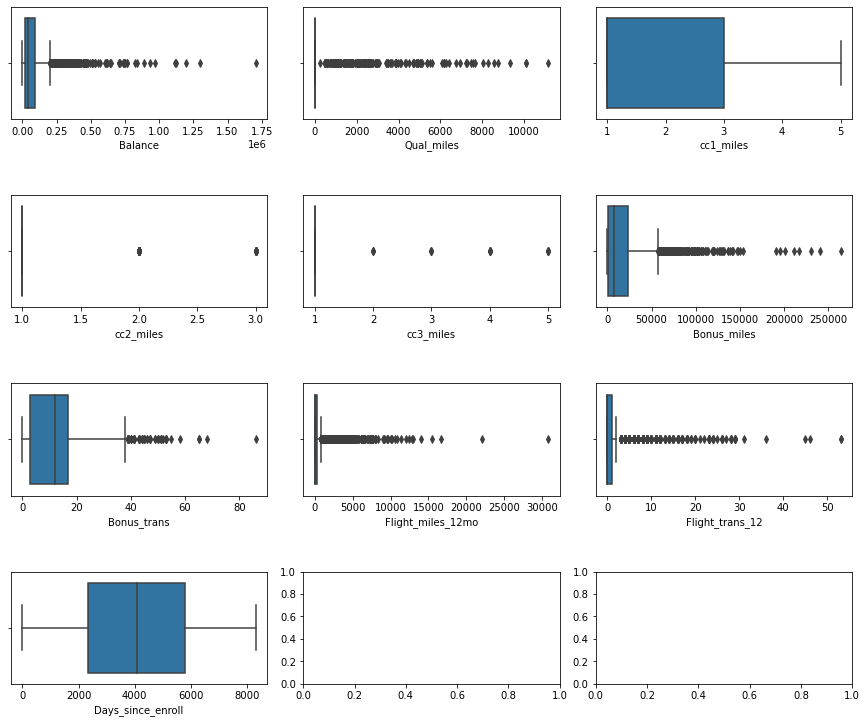

In [63]:
# Checking for outliers using boxplot

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(12, 10))
index = 0
axs = axs.flatten()
data1 = data.iloc[:,0:]
for k,v in data1.items():
    sns.boxplot(k, data=data1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.55, w_pad=0.5, h_pad=4.0)

In [64]:
# Importing Variance Threshold to identify low Variance features

from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.05)
vt_data = vt.fit(data)
vt_data.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True])

In [65]:
# Dropping low Variance features

data.drop(["cc2_miles",'cc3_miles'], axis=1, inplace = True)

In [66]:
# Winsorizing the outliers to retain the data from the outliers

for col in data.columns:
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    upper_end = data[col].quantile(0.75) + (1.5*IQR)
    low_end = data[col].quantile(0.25) - (1.5*IQR)
    if low_end < 0:
        low_end = 0
        data[col] = pd.DataFrame(np.where(data[col] > upper_end,upper_end, 
                          np.where(data[col] < low_end,low_end,data[col])))
    else:
        data[col] = pd.DataFrame(np.where(data[col] > upper_end,upper_end, 
                          np.where(data[col] < low_end,low_end,data[col])))        

<AxesSubplot:xlabel='cc1_miles', ylabel='count'>

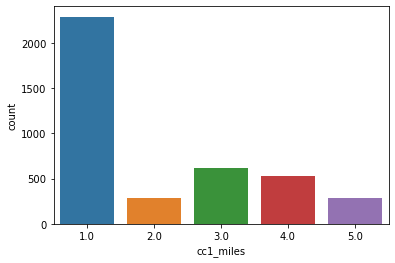

In [67]:
# Countplots
sns.countplot(data.cc1_miles)

<AxesSubplot:xlabel='Days_since_enroll', ylabel='Balance'>

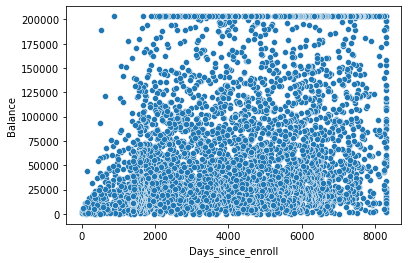

In [68]:
# Scatterplot
sns.scatterplot(x = data.Days_since_enroll , y = data.Balance)

Higher the days since enrolled higher is the balance

In [69]:
# Standardization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_data = pd.DataFrame(sc.fit_transform(data),columns = data.columns)

In [70]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
norm_data = pd.DataFrame(mm.fit_transform(data),columns = data.columns)

# PCA 

In [71]:
# Applying pca on standardized dataset

from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca_std_data = pca.fit_transform(std_data)

# Finding cumulative variance of each feature
np.cumsum(pca.explained_variance_ratio_* 100)

array([46.09844706, 70.42045615, 83.91032574, 92.36637318, 98.03654303])

5 PCA components give 98% variance

In [72]:
# Applying pca on normalized dataset

from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca_norm_data = pca.fit_transform(norm_data)

# Finding cumulative variance of each feature
np.cumsum(pca.explained_variance_ratio_* 100)

array([47.9194221 , 78.27500995, 87.32637806, 93.90299437, 97.62627778,
       98.84498033])

6 PCA components give 99% variance

# Hierarchical Clustering 

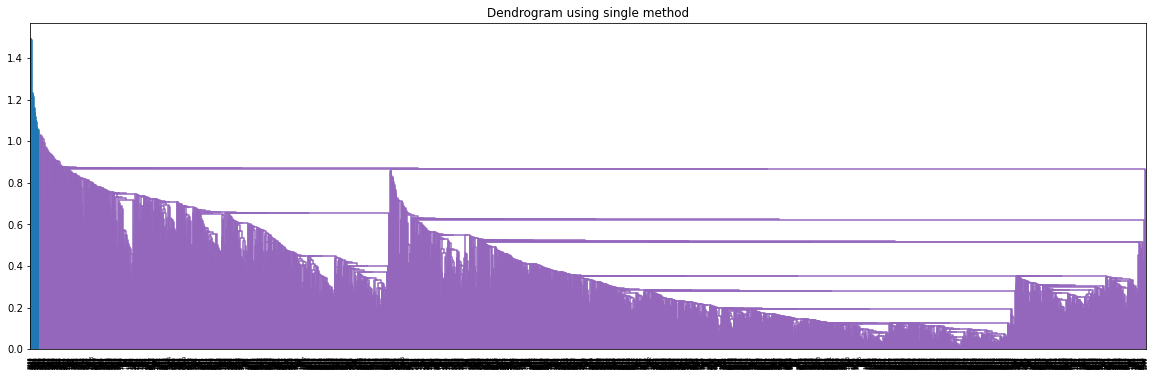

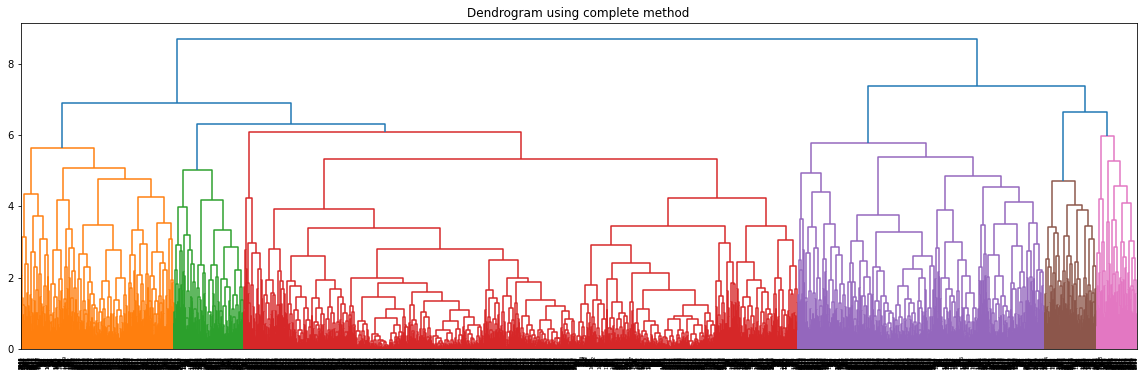

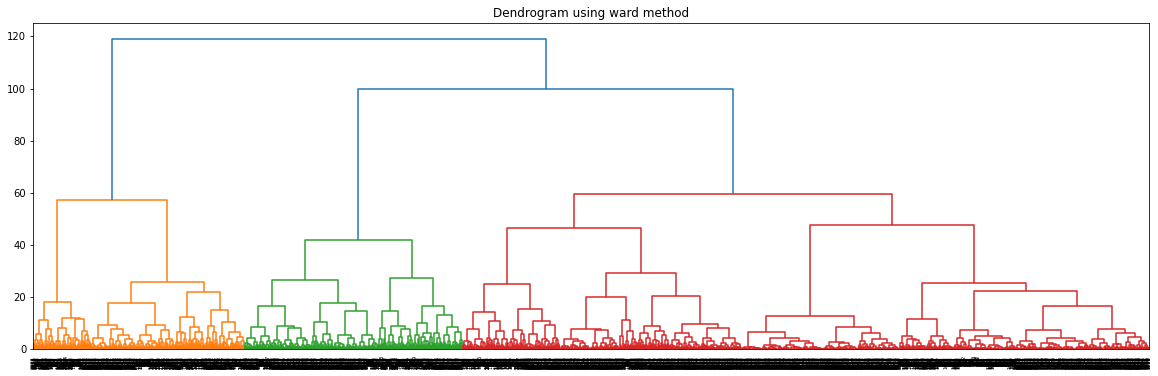

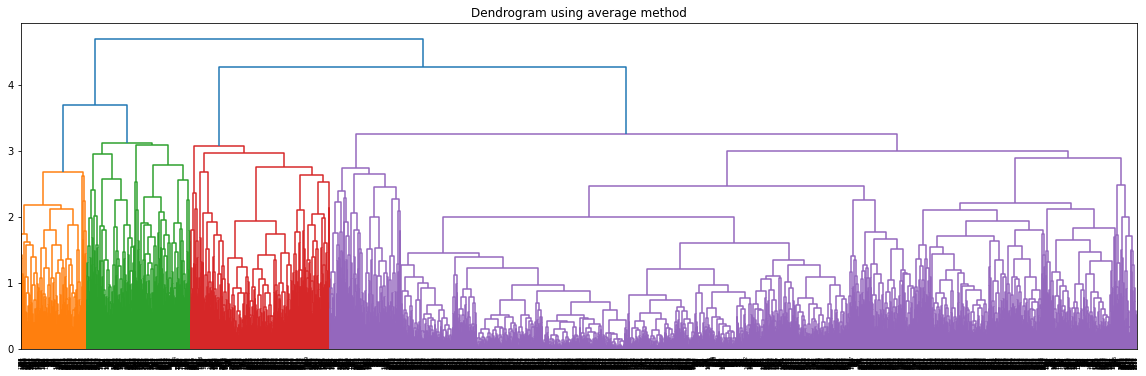

In [73]:
# Checking Dendogram for the dataset

import scipy.cluster.hierarchy as sch
for meth in ['single','complete','ward','average']:
    plt.figure(figsize =(20, 6))
    dendo = sch.dendrogram(sch.linkage(pca_std_data, method = meth))
    plt.title('Dendrogram using {} method'.format(meth))

In [74]:
# Agglomerative Clustering to check for number of clusters on standardised dataset

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for cluster in range(2,7):
    print('\n')
    for link in ['single','complete','ward','average']:
        Agg_cluster = AgglomerativeClustering(n_clusters = cluster, linkage = link, affinity='euclidean')
        cluster_labels = Agg_cluster.fit_predict(pca_std_data)
        s_score = silhouette_score(pca_std_data,cluster_labels)
        print('For {} clusters ({}) silhouette score is {}.'.format(cluster,link,s_score))



For 2 clusters (single) silhouette score is 0.24993896091173456.
For 2 clusters (complete) silhouette score is 0.2976246144765817.
For 2 clusters (ward) silhouette score is 0.3303711033176317.
For 2 clusters (average) silhouette score is 0.3466111669775883.


For 3 clusters (single) silhouette score is 0.15665798081158125.
For 3 clusters (complete) silhouette score is 0.2596458048040032.
For 3 clusters (ward) silhouette score is 0.31328519460653914.
For 3 clusters (average) silhouette score is 0.34630383747076204.


For 4 clusters (single) silhouette score is 0.11780083480572966.
For 4 clusters (complete) silhouette score is 0.31004008421505874.
For 4 clusters (ward) silhouette score is 0.213054130528553.
For 4 clusters (average) silhouette score is 0.3100870314105173.


For 5 clusters (single) silhouette score is 0.10743385611140704.
For 5 clusters (complete) silhouette score is 0.29571755949972284.
For 5 clusters (ward) silhouette score is 0.2223307816716503.
For 5 clusters (averag

Selecting 4 clusters based on silhouette score.

In [75]:
# Agglomerative Clustering to check for number of clusters on normalized dataset

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for cluster in range(2,7):
    print('\n')
    for link in ['single','complete','ward','average']:
        Agg_cluster = AgglomerativeClustering(n_clusters = cluster,linkage = link, affinity='euclidean')
        cluster_labels = Agg_cluster.fit_predict(pca_norm_data)
        s_score = silhouette_score(pca_norm_data,cluster_labels)
        print('For {} clusters ({}) silhouette score is {}.'.format(cluster,link,s_score))



For 2 clusters (single) silhouette score is 0.25807667846720234.
For 2 clusters (complete) silhouette score is 0.3440303029033346.
For 2 clusters (ward) silhouette score is 0.3840940718071333.
For 2 clusters (average) silhouette score is 0.43136646267829043.


For 3 clusters (single) silhouette score is 0.2449668042687667.
For 3 clusters (complete) silhouette score is 0.40879106785906216.
For 3 clusters (ward) silhouette score is 0.32868770770160655.
For 3 clusters (average) silhouette score is 0.38686986544593716.


For 4 clusters (single) silhouette score is 0.07701630869001348.
For 4 clusters (complete) silhouette score is 0.3957628416629591.
For 4 clusters (ward) silhouette score is 0.3480927071390806.
For 4 clusters (average) silhouette score is 0.3809722997121603.


For 5 clusters (single) silhouette score is 0.06496785082498288.
For 5 clusters (complete) silhouette score is 0.36625028525097914.
For 5 clusters (ward) silhouette score is 0.29803969143387377.
For 5 clusters (aver

The silhouette score for normalized data is high compared to standardized data. 

Hence using normalized data will be better.

In [76]:
# Agglomerative Clustering using average linkage and 4 clusters

Agg_cluster = AgglomerativeClustering(n_clusters = 4, linkage = 'complete', affinity='euclidean')
cluster_labels = Agg_cluster.fit_predict(pca_norm_data)
s_score = silhouette_score(pca_norm_data,cluster_labels)
print('Silhouette Score for the clustering is {:.2f}%'.format(s_score*100))

Silhouette Score for the clustering is 39.58%


In [77]:
# Adding cluster labels to dataset

data['cluster_labels'] = pd.DataFrame(cluster_labels) 

<AxesSubplot:xlabel='cluster_labels', ylabel='count'>

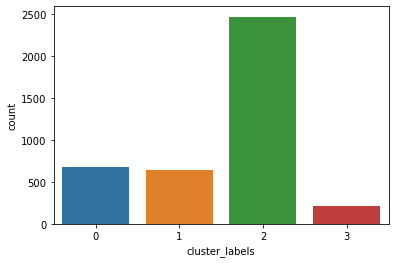

In [78]:
# Countplot of the clusters
sns.countplot(data.cluster_labels)

Majority of data belong to Cluster 2

In [79]:
data.head()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster_labels
0,28143.0,0.0,1.0,174.0,1.0,0.0,0.0,7000.0,2
1,19244.0,0.0,1.0,215.0,2.0,0.0,0.0,6968.0,2
2,41354.0,0.0,1.0,4123.0,4.0,0.0,0.0,7034.0,2
3,14776.0,0.0,1.0,500.0,1.0,0.0,0.0,6952.0,2
4,97752.0,0.0,4.0,43300.0,26.0,777.5,2.5,6935.0,3


<AxesSubplot:xlabel='Days_since_enroll', ylabel='Balance'>

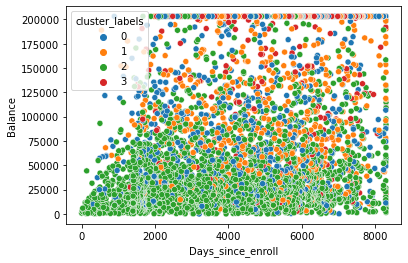

In [80]:
# ScatterPlot
sns.scatterplot(y = data.Balance, x = data.Days_since_enroll, hue=data.cluster_labels,palette = 'tab10',alpha=1)

In [81]:
data.groupby(data.cluster_labels).mean()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
cluster_labels,,,,,,,,
0,83885.246701,0.0,1.419355,10338.489736,12.574780,650.489736,2.127566,4296.554252
1,106813.123245,0.0,4.185647,42770.529641,18.174727,107.251170,0.349454,4952.942278
2,41240.976978,0.0,1.487221,6828.832252,8.151318,18.434888,0.078702,3750.752130
3,131160.265403,0.0,4.355450,48946.355450,26.312796,730.902844,2.353081,5305.350711


Cluster 0 represents group of customers who have good balance since they enrolled.

Cluster 1 represents 2nd most travelling customers.

Cluster 2 represents group of customers who have least balance and have enrolled for less days.

Cluster 3 represents group of customers who are the most frequent flyers having highest balance.